## 예제
1. drinks.csv 파일 로드
2. 결측치를 확인
3. 데이터프레임의 정보 출력
4. continent 컬럼에서 결측치 존재 => 결측치 'OT'로 대체
5. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
6. total_litres_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력
7. 국가별 술 소비량 대비 알콜 비율 컬럼 추가

In [70]:
import pandas as pd
import numpy as np

In [105]:
drink = pd.read_csv('../230331/230403/230404/csv/drinks.csv')

In [106]:
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [107]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [108]:
flg = drink['continent'].isna()

In [109]:
#결측치를 'OT' 대체
# 결측치를 대체하는 함수 -> fillna('OT')
# drinks.loc[결측치인 조건, 'continent'] = 'OT'
drink['continent'] = drink['continent'].fillna('OT')

In [125]:
#continent별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
all = drink[['continent', 'spirit_servings']].groupby('continent').agg(['mean', 'min', 'max', 'sum'])

In [122]:
pd.pivot_table(
    drink,
    index = 'continent',
    values = 'spirit_servings',
    aggfunc = ['mean', 'min', 'max', 'sum'] 
    
)

,mean,min,max,sum
,spirit_servings,spirit_servings,spirit_servings,spirit_servings
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [116]:

drink_mean_s = drink[['continent', 'spirit_servings']].groupby('continent').mean()
drink_mean_s

,spirit_servings
continent,
AF,16.339623
AS,60.840909
EU,132.555556
OC,58.437500
OT,165.739130
SA,114.750000


In [111]:
drink_min_s = drink[['continent', 'spirit_servings']].groupby('continent').min()

In [112]:
drink_max_s = drink[['continent', 'spirit_servings']].groupby('continent').max()

In [117]:
drink_sum_s = drink[['continent', 'spirit_servings']].groupby('continent').sum()

In [115]:
# 전체 알콜의 소비량 평균보다 높은 대륙은 ?

# 전체 알콜 소비량의 평균
total_mean = drink['total_litres_of_pure_alcohol'].mean()


4.717098445595855

In [132]:

group_data = drink[['continent', 'total_litres_of_pure_alcohol']].groupby('continent').mean()['total_litres_of_pure_alcohol']
group_data

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [133]:
group_data[group_data > total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [139]:
# 국가별 술 소비량 대비 알콜의 비율 생성 

# 국가별 술 소비량 파생변수 생성
drink['total_servings'] = drink['beer_servings'] + drink['spirit_servings'] + drink['wine_servings']

In [141]:
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [144]:
# 술 소비량 대비 알콜의 비율 파생변수 생성
# 알콜 소비량 / 술 소비량 * 100
# 결측치가 나온다면 0으로 대체

drink['alcohol_rate'] = (drink['total_litres_of_pure_alcohol'] / drink['total_servings'] * 100).fillna(0)

In [145]:
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [159]:
#가장 독한 술을 먹는 나라는 어디인가

drink_rank = drink.sort_values('alcohol_rate', ascending = False, ignore_index = True)

In [166]:
# 우리나라는 얼마나 독한 술을 마시는가

drink_rank.loc[drink_rank['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [168]:
# 북한은 얼마나 독한 술을 먹는가

drink_rank.loc[drink_rank['country'] == 'North Korea']


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
181,North Korea,0,0,0,0.0,AS,0,0.0


In [152]:
drink.sort_values('total_litres_of_pure_alcohol', ascending = False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
15,Belarus,142,373,42,14.4,EU,557,2.585278
98,Lithuania,343,244,56,12.9,EU,643,2.006221
3,Andorra,245,138,312,12.4,EU,695,1.784173
68,Grenada,199,438,28,11.9,OT,665,1.789474
45,Czech Republic,361,170,134,11.8,EU,665,1.774436
...,...,...,...,...,...,...,...,...
79,Iran,0,0,0,0.0,AS,0,0.000000
90,Kuwait,0,0,0,0.0,AS,0,0.000000
128,Pakistan,0,0,0,0.0,AS,0,0.000000
97,Libya,0,0,0,0.0,AF,0,0.000000


In [157]:
(drink.loc[('alcohol_rate') & (['country'] == "SouthKorea")]

SyntaxError: incomplete input (3204520639.py, line 1)

In [124]:
import matplotlib.pyplot as plt

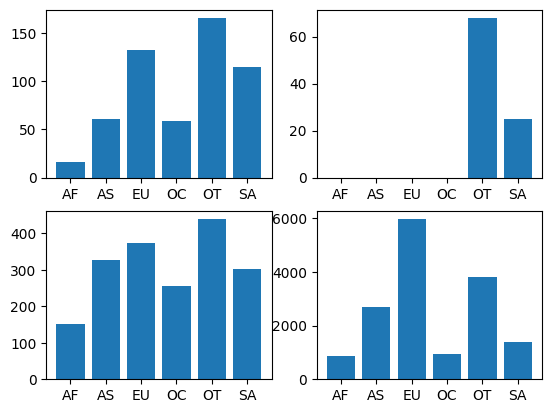

In [129]:
# 바형 그래프
# 한 화면에 4개의 그래프 
# bar() x와 y의 값이 필수 항목
x = all.index

# subplot(행의 수, 열의 수, 영역지정)
plt.subplot(2, 2, 1)
plt.bar(x, all['spirit_servings']['mean'])

plt.subplot(2, 2, 2)
plt.bar(x, all['spirit_servings']['min'])

plt.subplot(2, 2, 3)
plt.bar(x, all['spirit_servings']['max'])

plt.subplot(2, 2, 4)
plt.bar(x, all['spirit_servings']['sum'])

plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


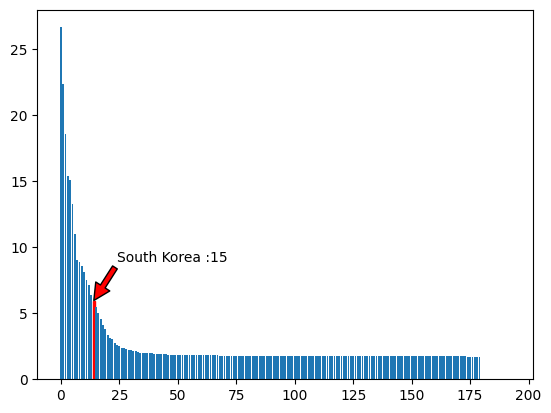

In [186]:
# 시각화
# 우리나라를 그래프에서 표기

x = list(range(len(drink_rank)))
y = drink_rank['alcohol_rate']

# 국가 리스트
country_list = drink_rank['country'].tolist()

bar_list = plt.bar(x, y)

korea_rank = country_list.index('South Korea')
korea_alcohol_rate = drink_rank.loc[drink_rank['country'] == 'South Korea', 'alcohol_rate']

#그래프 커스텀

# South Korea 막대 색상 변경
bar_list[(country_list.index('South Korea'))].set_color('r')

# plt.show()

#그래프에 글씨와 화살표 추가
plt.annotate('South Korea :'  + str(korea_rank + 1),
             xy = (korea_rank, korea_alcohol_rate),
             xytext = (korea_rank + 10, korea_alcohol_rate + 3),
             arrowprops = dict(facecolor = 'r', shrink = 0.01)
             )

plt.show()